In [1]:
#Prediction for Credit Card Approval


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [4]:
print("Train Data Overview:")
print(train_data.head())

Train Data Overview:
        ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phon

In [5]:
print("\nTest Data Overview:")
print(test_data.head())


Test Data Overview:
        ID Gender Has a car Has a property  Children count    Income  \
0  5091261      F         N              Y               0  202500.0   
1  5096963      M         Y              N               0  675000.0   
2  5087880      F         N              N               0  234000.0   
3  5021949      F         Y              Y               0  445500.0   
4  5105705      F         Y              N               0  225000.0   

      Employment status                Education level  Marital status  \
0         State servant  Secondary / secondary special       Separated   
1  Commercial associate               Higher education         Married   
2         State servant               Higher education  Civil marriage   
3  Commercial associate               Higher education         Married   
4               Working  Secondary / secondary special         Married   

              Dwelling    Age  Employment length  Has a mobile phone  \
0    House / apartment -16834

In [6]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [7]:
# Summary statistics of numerical features
print("Summary Statistics of Numerical Features:")
print(train_data.describe())

Summary Statistics of Numerical Features:
                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000          

In [8]:
# Summary statistics of categorical features
print("\nSummary Statistics of Categorical Features:")
print(train_data.describe(include=['object']))


Summary Statistics of Categorical Features:
       Gender Has a car Has a property Employment status  \
count   29165     29165          29165             29165   
unique      2         2              2                 5   
top         F         N              Y           Working   
freq    19549     18128          19557             15056   

                      Education level Marital status           Dwelling  \
count                           29165          29165              29165   
unique                              5              5                  6   
top     Secondary / secondary special        Married  House / apartment   
freq                            19803          20044              26059   

       Job title  
count      20138  
unique        18  
top     Laborers  
freq        5004  


In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

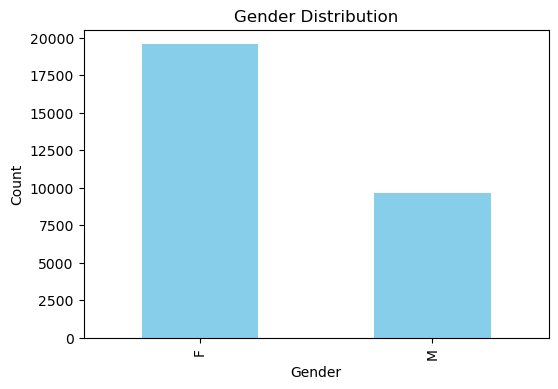

In [10]:
# Visualize Gender Distribution
plt.figure(figsize=(6, 4))
train_data['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

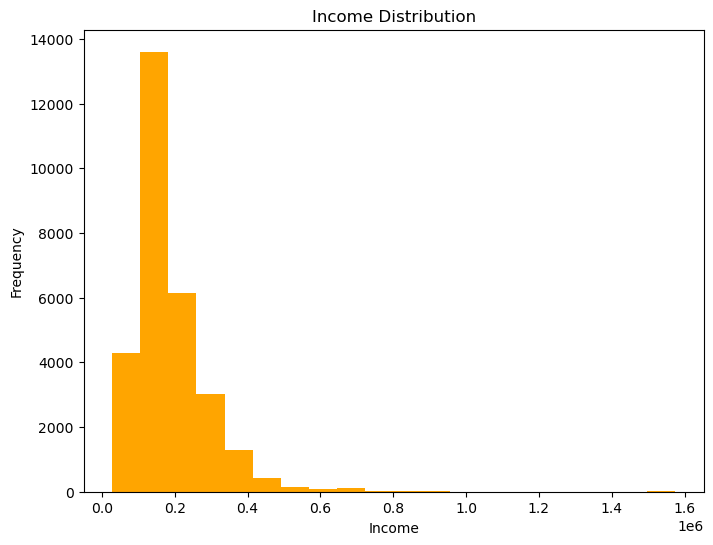

In [11]:
# Visualize Income Distribution
plt.figure(figsize=(8, 6))
plt.hist(train_data['Income'], bins=20, color='orange')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

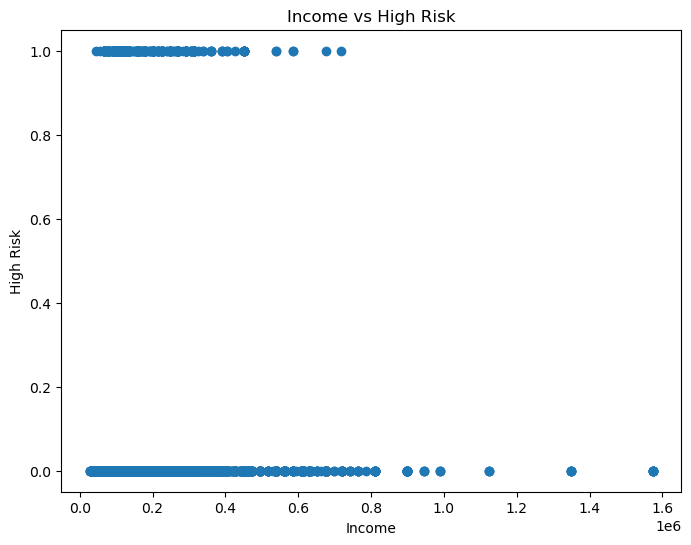

In [12]:
# Bivariate Analysis
# Relationship between Income and High Risk
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Income'], train_data['Is high risk'])
plt.title('Income vs High Risk')
plt.xlabel('Income')
plt.ylabel('High Risk')
plt.show()

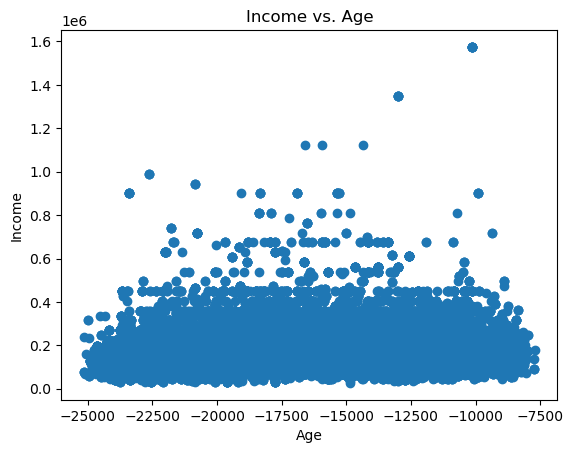

In [13]:
# Bivariate Analysis for 'Income' vs. 'Age'
plt.scatter(train_data['Age'], train_data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs. Age')
plt.show()


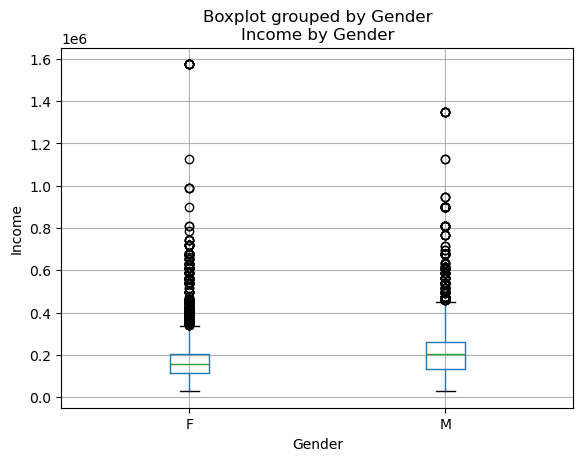

In [14]:
# Bivariate Analysis for 'Gender' vs. 'Income'
train_data.boxplot(column='Income', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income by Gender')
plt.show()


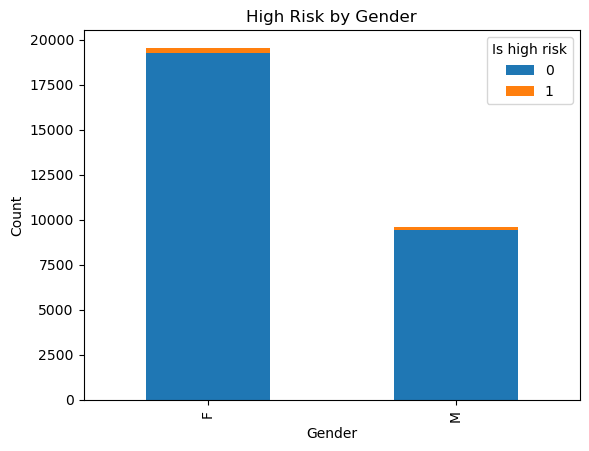

In [15]:
#Bivariate Analysis for 'Gender' vs. 'High Risk'
gender_high_risk = pd.crosstab(train_data['Gender'], train_data['Is high risk'])
gender_high_risk.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('High Risk by Gender')
plt.show()

In [16]:


# Label encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level',
                    'Marital status', 'Dwelling', 'Job title']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))
    test_data[col] = label_encoder.transform(test_data[col].astype(str))


<Figure size 1200x1000 with 0 Axes>

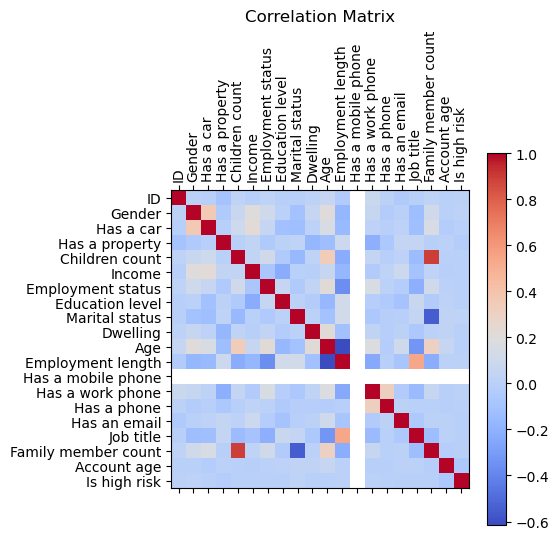

In [17]:
# Visualize Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


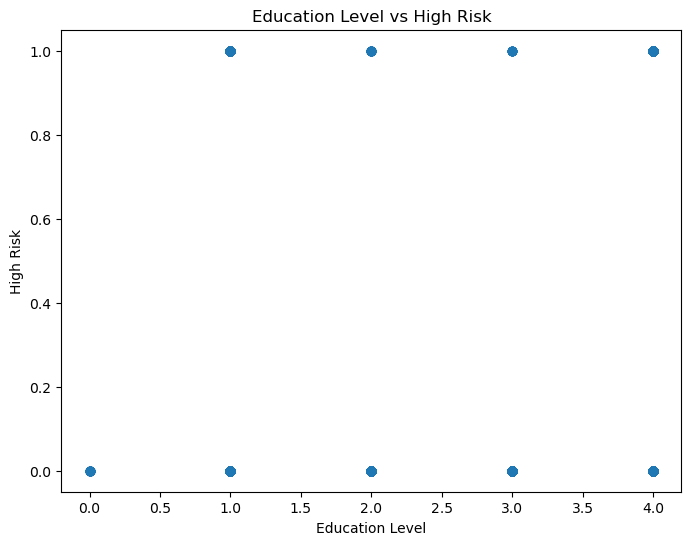

In [18]:
# Bivariate Analysis with encoded categorical variables
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Education level'], train_data['Is high risk'])
plt.title('Education Level vs High Risk')
plt.xlabel('Education Level')
plt.ylabel('High Risk')
plt.show()

## Feature Engineering

In [19]:
# Interaction Term: Income * Age

train_data['Income_Age_interaction'] = train_data['Income'] * train_data['Age']
test_data['Income_Age_interaction'] = test_data['Income'] * test_data['Age']

In [20]:
# Aggregating Information: Total number of phones

train_data['Total_phones'] = train_data['Has a mobile phone'] + train_data['Has a work phone'] + train_data['Has a phone']
test_data['Total_phones'] = test_data['Has a mobile phone'] + test_data['Has a work phone'] + test_data['Has a phone']


In [21]:
# Transforming Existing Feature: Log transformation of Income

train_data['Log_Income'] = np.log(train_data['Income'] + 1)  # Adding 1 to avoid log(0)
test_data['Log_Income'] = np.log(test_data['Income'] + 1)


In [22]:
# the updated dataset

print(train_data.head())

        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

   Employment status  Education level  Marital status  Dwelling  ...  \
0                  4                4               1         5  ...   
1                  0                1               3         1  ...   
2                  0                4               1         1  ...   
3                  0                1               3         1  ...   
4                  4                4               2         1  ...   

   Has a work phone  Has a phone  Has an email  Job title  \
0                 0            0             0         

In [23]:
# Aggregating information
train_data['Total_Phone_Count'] = train_data['Has a mobile phone'] + train_data['Has a work phone'] + train_data['Has a phone']
test_data['Total_Phone_Count'] = test_data['Has a mobile phone'] + test_data['Has a work phone'] + test_data['Has a phone']

# Creating interaction terms
train_data['Income_Education'] = train_data['Income'] * train_data['Education level']
test_data['Income_Education'] = test_data['Income'] * test_data['Education level']

# Applying domain-specific knowledge
# we create a feature indicating whether the applicant has a car and a property
train_data['Car_Property'] = train_data['Has a car'] & train_data['Has a property']
test_data['Car_Property'] = test_data['Has a car'] & test_data['Has a property']


In [24]:
#the updated dataset

print(train_data.head())

        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

   Employment status  Education level  Marital status  Dwelling  ...  \
0                  4                4               1         5  ...   
1                  0                1               3         1  ...   
2                  0                4               1         1  ...   
3                  0                1               3         1  ...   
4                  4                4               2         1  ...   

   Job title  Family member count  Account age  Is high risk  \
0          3                  2.0        -17.0      

## Data Preprocessing

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = train_data.drop(columns=['Is high risk'])
y = train_data['Is high risk']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing steps to the data
X_processed = preprocessor.fit_transform(X)

# Check the shape of the processed data
print("Shape of processed data:", X_processed.shape)


Shape of processed data: (29165, 16)


## ML Models

In [40]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Logistic Regression

In [42]:
# Instantiate MinMaxScaler and use it to rescale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_train = scaler.fit_transform(X_train)
X_rescaled_test = scaler.transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_rescaled_train, y_train)

LogisticRegression()

In [43]:
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred_test = logreg.predict(X_rescaled_test)
y_pred_train = logreg.predict(X_rescaled_train)

# Get the accuracy score of logreg model and print it
accuracy_test = logreg.score(X_rescaled_test, y_test)
accuracy_train = logreg.score(X_rescaled_train, y_train)
print("Test: Accuracy =", accuracy_test)
print("Train: Accuracy =", accuracy_train)

# Print the confusion matrix of the logreg model
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))
print("\nConfusion Matrix (Train Set):")
print(confusion_matrix(y_train, y_pred_train))


Test: Accuracy = 0.9852563003600205
Train: Accuracy = 0.9822989885136294

Confusion Matrix (Test Set):
[[5747    0]
 [  86    0]]

Confusion Matrix (Train Set):
[[22919     0]
 [  413     0]]


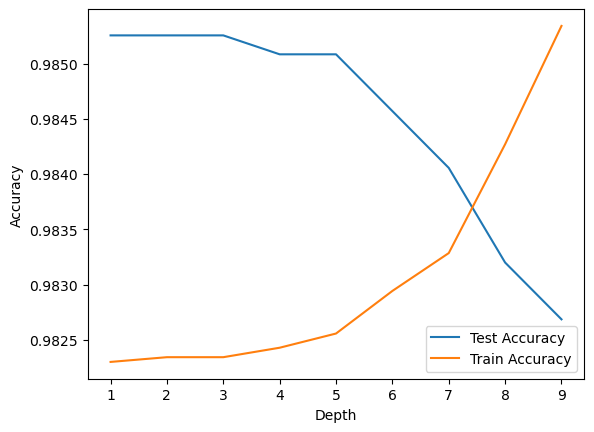

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pandas import DataFrame
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
list_score = []

for i in range(1, 10):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtc.fit(X_train, y_train)

    train_pred = dtc.predict(X_train)
    test_pred = dtc.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))
    
    list_score.append([i, accuracy_score(train_pred, y_train), accuracy_score(test_pred, y_test)])

# Convert list_score to DataFrame
df2 = DataFrame(list_score, columns=['Depth', 'Train Accuracy', 'Test Accuracy'])

# Plotting
plt.plot(df2['Depth'], df2['Test Accuracy'], label='Test Accuracy')
plt.plot(df2['Depth'], df2['Train Accuracy'], label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Random Forests

Random Forest Train score: 0.9999571404080233
Random Forest Test score: 0.983027601577233


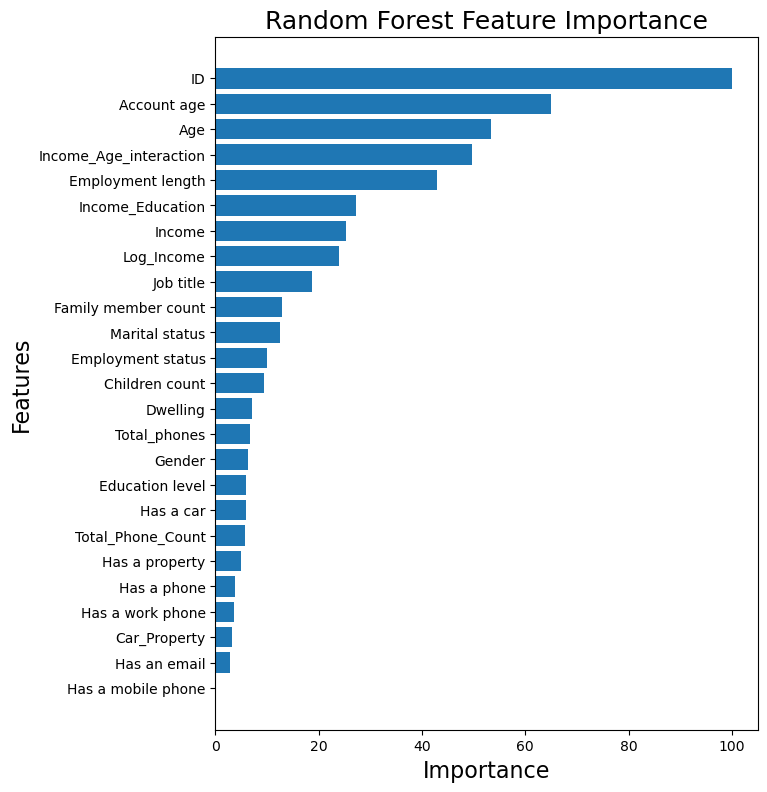

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predictions on training and testing sets
train_predict_rf = rf_clf.predict(X_train)
test_predict_rf = rf_clf.predict(X_test)

# Calculate accuracy scores
train_acc_rf = accuracy_score(y_train, train_predict_rf)
test_acc_rf = accuracy_score(y_test, test_predict_rf)

# Print accuracy scores
print('Random Forest Train score:', train_acc_rf)
print('Random Forest Test score:', test_acc_rf)

#Plotting
feature_importance_rf = rf_clf.feature_importances_
# Make importances relative to max importance
feature_importance_rf = 100.0 * (feature_importance_rf / feature_importance_rf.max())
sorted_idx_rf = np.argsort(feature_importance_rf)
pos_rf = np.arange(sorted_idx_rf.shape[0]) + .5
plt.figure(figsize=(7, 9))
plt.barh(pos_rf, feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(pos_rf, X.columns[sorted_idx_rf])
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Random Forest Feature Importance', fontsize=18)
plt.show()

## Gradient Boosting

Gradient Train score: 0.9844419681124635
Graident Test score: 0.9843991085204868


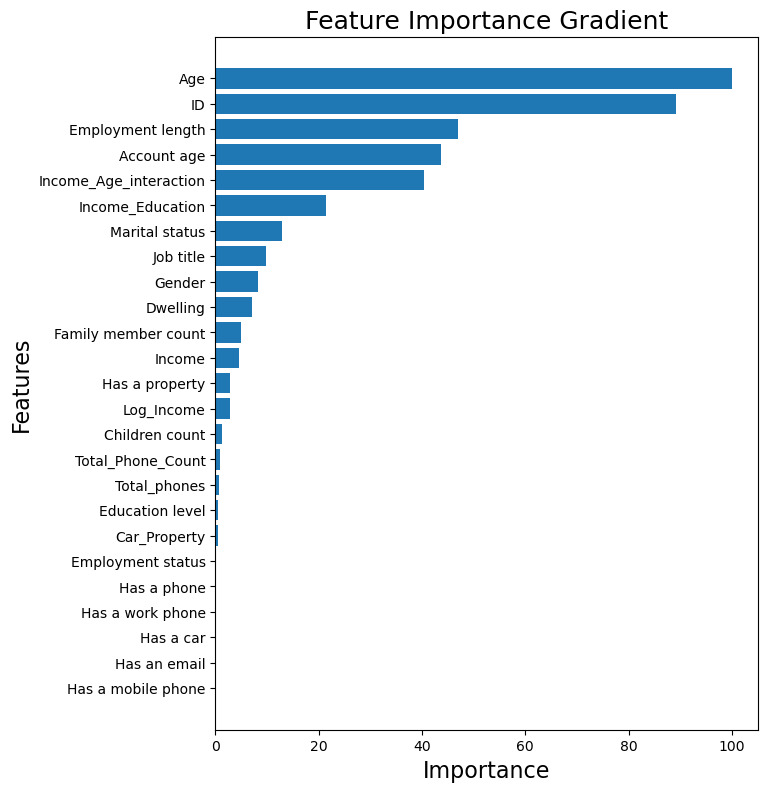

In [46]:
from sklearn.ensemble import GradientBoostingClassifier


# Instantiate the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predictions on training and testing sets
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

# Calculate accuracy scores
train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

# Print accuracy scores
print('Gradient Train score:', train_acc)
print('Graident Test score:', test_acc)

# Plot feature importance
feature_importance = clf.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance Gradient', fontsize=18)
plt.show()


## AdaBoost

ADA Train score: 0.9824275672895594
ADA Test score: 0.9852563003600205


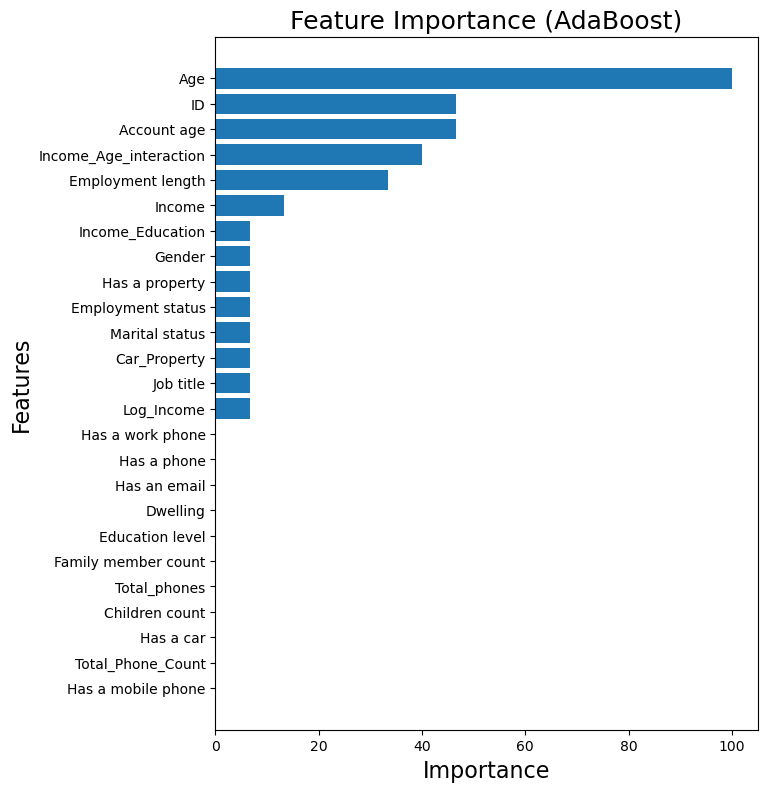

In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=0)

# Fit the model on the training data
ada_clf.fit(X_train, y_train)

# Predictions on training and testing sets
train_predict_ada = ada_clf.predict(X_train)
test_predict_ada = ada_clf.predict(X_test)

# Calculate accuracy scores
train_acc_ada = accuracy_score(y_train, train_predict_ada)
test_acc_ada = accuracy_score(y_test, test_predict_ada)

# Print accuracy scores
print('ADA Train score:', train_acc_ada)
print('ADA Test score:', test_acc_ada)

# Plotting
feature_importance = ada_clf.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance (AdaBoost)', fontsize=18)
plt.show()

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

Train score: 0.9836276358649065
Test score: 0.9849134236242071


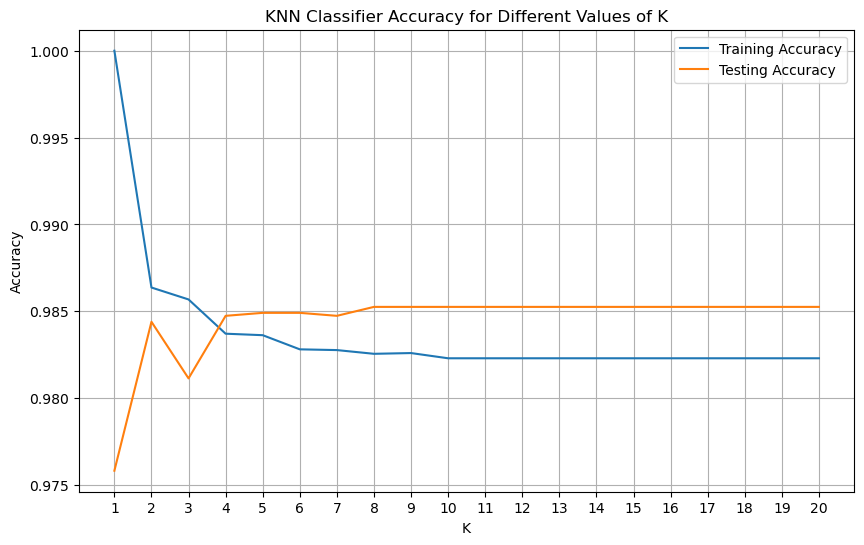

In [56]:
neighbors = range(1, 11)

# Lists to store training and testing accuracies
train_accs = []
test_accs = []

# Instantiate a KNeighborsClassifier with default parameter values
knn = KNeighborsClassifier()

# Fit knn to the train set
knn.fit(X_rescaled_train, y_train)

# Predictions on training and testing sets
train_predict = knn.predict(X_rescaled_train)
test_predict = knn.predict(X_rescaled_test)

# Calculate accuracy scores
train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

# Print accuracy scores
print('Train score:', train_acc)
print('Test score:', test_acc)


for k in range(1, 21):
    # Instantiate KNeighborsClassifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit knn to the train set
    knn.fit(X_rescaled_train, y_train)
    
    # Predictions on training and testing sets
    train_predict = knn.predict(X_rescaled_train)
    test_predict = knn.predict(X_rescaled_test)
    
    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, train_predict)
    test_acc = accuracy_score(y_test, test_predict)
    
    # Append accuracies to lists
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accs, label='Training Accuracy')
plt.plot(range(1, 21), test_accs, label='Testing Accuracy')
plt.title('KNN Classifier Accuracy for Different Values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


## Predicting Credit Card Approval

In [68]:
# Preprocess the test data (scale features)
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_test = scaler.fit_transform(X_test)

# Load the trained logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_rescaled_train, y_train)

# Use the trained model to make predictions on the test data
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred_test = logreg.predict(X_rescaled_test)
y_pred_train = logreg.predict(X_rescaled_train)

# Get the accuracy score of logreg model and print it
accuracy_test = logreg.score(X_rescaled_test, y_test)
accuracy_train = logreg.score(X_rescaled_train, y_train)
print("Test: Accuracy =", accuracy_test)
print("Train: Accuracy =", accuracy_train)

# Print the confusion matrix of the logreg model
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))
print("\nConfusion Matrix (Train Set):")
print(confusion_matrix(y_train, y_pred_train))


from sklearn.metrics import accuracy_score


if y_test is not None:
    test_accuracy = accuracy_score(y_test, predictions)
    print("Test Accuracy:", test_accuracy)


# Map numerical predictions to labels
predicted_labels = ['approved' if pred == 1 else 'not approved' for pred in predictions]

# Print the predicted labels
print("Predicted Labels:", predicted_labels)



if hasattr(logreg, 'coef_'):
    feature_importance = logreg.coef_[0]
    print("Feature Importance Scores:", feature_importance)





Test: Accuracy = 0.9852563003600205
Train: Accuracy = 0.9822989885136294

Confusion Matrix (Test Set):
[[5747    0]
 [  86    0]]

Confusion Matrix (Train Set):
[[22919     0]
 [  413     0]]
Test Accuracy: 0.9852563003600205
Predicted Labels: ['not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'not approved', 'no